In [4]:
import pysal as ps 
import pandas as pd 
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal.lib
import pysal.explore
import pysal.viz
import pysal.model
#from pysal.lib import weights, examples
#from pysal.lib.weights.weights import W
#from pysal.lib.weights.contiguity import Queen
#from pysal.lib import examples



In [2]:
ps.lib.examples.available()
ps.lib.examples.explain('mexico')
    
# ps.lib.weights

{'name': 'mexico',
 'description': 'Decennial per capita incomes of Mexican states 1940-2000',
 'explanation': ['* mexico.csv: attribute data. (n=32, k=13)',
  '* mexico.gal: spatial weights in GAL format.',
  '* mexicojoin.shp: Polygon shapefile. (n=32)',
  'Data used in Rey, S.J. and M.L. Sastre Gutierrez. (2010) "Interregional inequality dynamics in Mexico." Spatial Economic Analysis, 5: 277-298.']}

In [7]:
path = "C:/Users/jwolf/Documents/MEGA/03_Doutoramento/05_SIG/Administrativos/Freguesias/Freguesia_CAOP_2010.shp"
gdf = gpd.read_file (path)
#freguesias_shp = ps.open(path + '.shp')
#freguesias_dbf = ps.open(path + '.dbf')
#freguesias_dbf.header

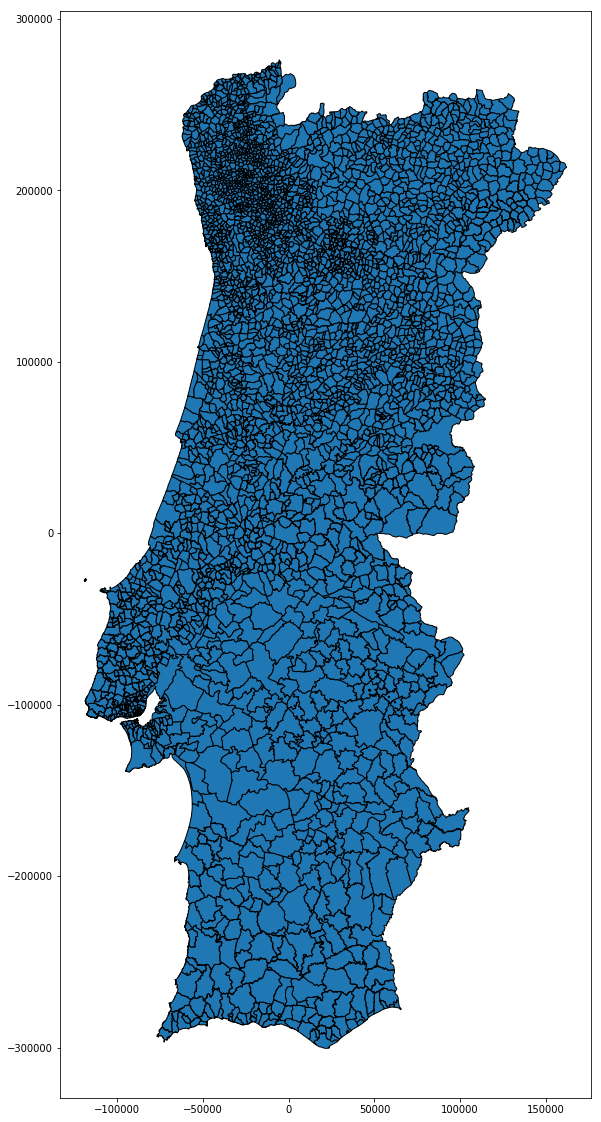

In [8]:
gdf.plot(figsize=(20, 20), edgecolor='k')

In [9]:
w3= pysal.lib.weights.KNN.from_shapefile(path, k= 3)
w5= pysal.lib.weights.KNN.from_shapefile(path, k= 5)
w7= pysal.lib.weights.KNN.from_shapefile(path, k= 7)

In [25]:
w_distancia_20 = pysal.lib.weights.DistanceBand.from_shapefile(path, p = 2, alpha=-2, binary=False, threshold= 1500)
pysal.lib.weights.DistanceBand()

C:\Users\jwolf\AppData\Local\conda\conda\envs\pandas\lib\site-packages\pysal\lib\weights\weights.py:168: UserWarning: There are 3502 disconnected observations 
  Island ids: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 19

TypeError: __init__() missing 2 required positional arguments: 'data' and 'threshold'

In [12]:
gdf.columns

Index(['POLY_ID', 'Dicofre', 'Pop_1991', 'Pop_2001', 'Pop_2011', 'Var01_pond',
       'Var11_pond', 'Var91_01', 'Var01_11', 'Area', 'Nome_freg', 'Densid_11',
       'Centro_urb', 'geometry'],
      dtype='object')

In [ ]:
y = gdf['Var91_01']

#w_distancia_20.islands
moran_dist_20 = pysal.explore.esda.Moran_Local(y, w_distancia_20, transformation='r', permutations=999)
moran_dist_20_Var91_01 = pysal.explore.esda.Moran_Local(y2, w_distancia_20, transformation='r', permutations=999)

In [28]:
y = gdf['Var01_11']
y2 = gdf['Var01_11']
moran_3 = pysal.explore.esda.Moran_Local(y, w3, transformation='r', permutations=999)
moran_5 = pysal.explore.esda.Moran_Local(y, w5, transformation='r', permutations=999)
moran_5_Var91_01 = pysal.explore.esda.Moran_Local(y2, w5, transformation='r', permutations=999)
moran_7 = pysal.explore.esda.Moran_Local(y, w7, transformation='r', permutations=999)




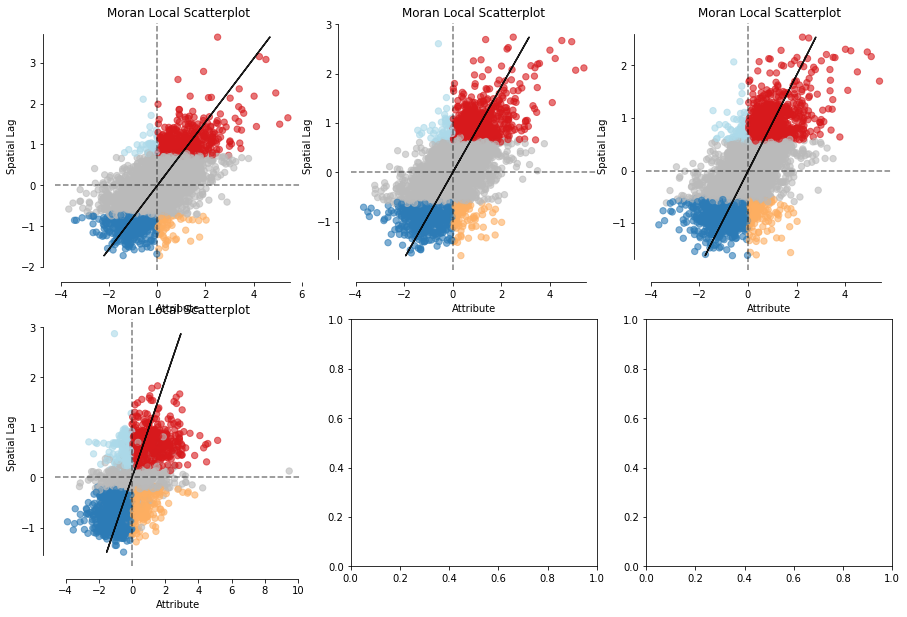

In [18]:
from pysal.viz.splot.esda import moran_scatterplot
fig, axs = plt.subplots(2, 3, figsize = (15,10))
moran_scatterplot(moran_3, p=0.05, ax = axs[0,0])
moran_scatterplot(moran_5, p=0.05, ax = axs[0,1])
moran_scatterplot(moran_7, p=0.05, ax = axs[0,2])
moran_scatterplot(moran_dist_20, p=0.05, ax = axs[1,0])
plt.show()

AttributeError: 'str' object has no attribute 'p_sim'

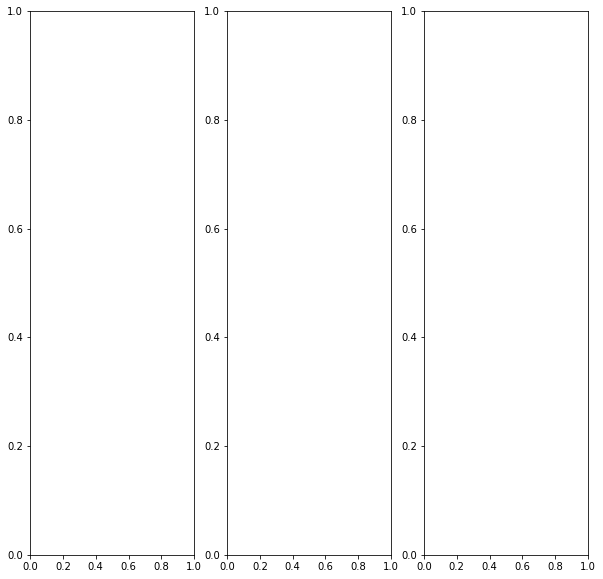

In [37]:
from pysal.viz.splot.esda import lisa_cluster
from pysal.viz.splot.esda import plot_local_autocorrelation
gdf1 = gdf.copy()
fig, axs = plt.subplots(1, 3, figsize = (10,10))

cartogramas = [(moran_dist_20, 'moran_dist_20'),(moran_5, '5_neighbors'),(moran_7, '7_neighbors')]
i=0 
for x in cartogramas:
    legenda = {'loc': 'upper left', 'bbox_to_anchor': (0.8, 0.28), 'title': x[1]}
    lisa_cluster(x[0], gdf1, p=0.1, ax = axs[i], legend_kwds= legenda)
    i += 1
# plt.show()

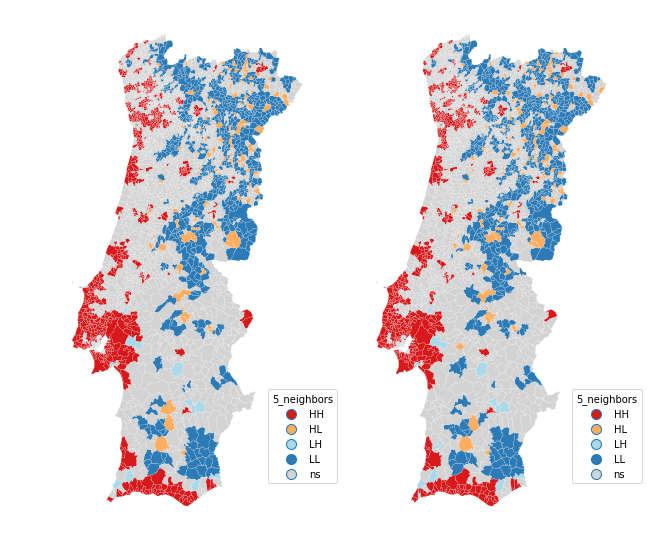

In [39]:
fig, axs = plt.subplots(1, 2, figsize = (10,10))
gdf2 = gdf.copy()
cartogramas = [(moran_5_Var91_01, '5_neighbors'),(moran_5, '5_neighbors')]
i=0 
for x in cartogramas:
    legenda = {'loc': 'upper left', 'bbox_to_anchor': (0.8, 0.28), 'title': x[1]}
    lisa_cluster(x[0], gdf2, p=0.1, ax = axs[i], legend_kwds= legenda)
    i += 1


# plt.show()
plt.savefig('MORAN.png')

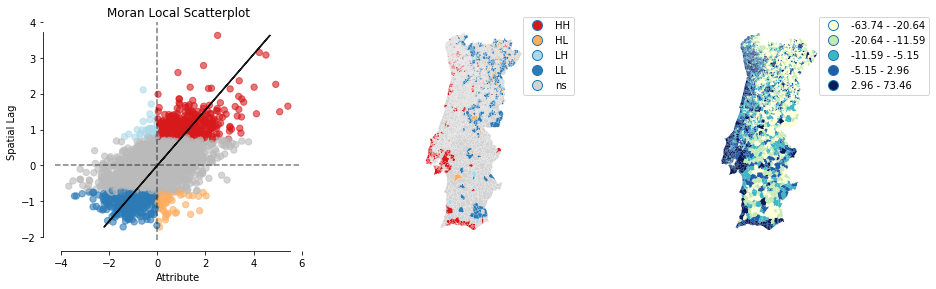

In [20]:
from pysal.viz.splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(moran_3, gdf, 'Var01_11')
plt.show()

In [ ]:
moran_3.q

In [ ]:
gdf